# Import Important Package

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Build Model

## Cost Function
# $ J(w)=\frac{1}{2m} \sum_{\ i}^m{(h{ (x ^i)}-y^i)^2} $

In [43]:
def computeCost(X,Y,weights):
    m=len(X)
    cost= (1/(2*m))*np.sum(np.power((X.dot(weights)-Y),2)  )
    return cost

## Gradient Desent
> ``Objective of Gradient descent is to minimize loss function`` 

# $h(x^i)=\beta^T X$
# $Loss=h(x^i)-y^i$
# $g=(h(x^i)-y^i)x^i $
# Update :$\theta=\theta-\alpha \times g$

In [45]:
def gradientDescent(X, Y, alpha,weights):
     m=len(X)
     
     h=X.dot(weights)
     loss=h-Y
     g=(X.T.dot(loss))/m
     weights=weights-alpha * g
     
     return weights  


In [47]:
def fit(X_train,Y_train,alpha=0.0001,iteration=1000): 

    weights=np.zeros((X_train.shape[1],1))
    cost=np.zeros(iteration) 
    for i in range(iteration):
        weights=gradientDescent(X_train,Y_train,alpha,weights)
        cost[i]=computeCost(X_train,Y_train,weights)
    return weights ,cost

# $h{ (x ^i)}=\beta^T X$

In [49]:
def predict(weights,X_test):
    Y_predict=X_test.dot(weights)
    return Y_predict

## Evaluate Performance 
by Mean absolute error (MAE) 


# $ MAE=\frac{\sum_{i}^n{(Y_{actual}-Y_{pred})^2}}{n}$

by Coefficient of Determination or R^2

 # $R_{2}=\frac{SSR}{SST}=\frac{\sum_{i}^n{(Y_{actual}-Y_{mean})^2}}{\sum_{i}^n{(Y_{pred}-Y_{mean})^2}}$




In [51]:
def EvaluatePerformance(Y,Y_pred):
    def R2(Y,Y_pred):
        mean_y = np.mean(Y)
        ss_tot = np.sum(np.power((Y - mean_y) , 2))
        ss_res = np.sum(np.power((Y - Y_pred),  2))
        r2 = 1 - (ss_res / ss_tot)
        return r2

    def MAE(Y,Y_pred):
        mae=np.sum(np.power((Y-Y_pred),2))/len(Y)
        return mae    

    return R2(Y,Y_pred), MAE(Y,Y_pred) 

#### I built Model at the first and then use it in **UniVariate DataSet** and **MultiVarite DataSet**

## Here we Process data and seperate feature than output 
also  We Assume that We Have Bias and Equation is 
$Y=W_{0}+W_{1} X_{1}+W_{2} X_{2}+....+W_{n} X_{n}$

**So we assume $X_{0} $  and its value all time equal to one**

In [53]:
def preprocessing(data):
    data.insert(0,'Bias',1)
    col=data.shape[1]
    X=data.iloc[:,:col-1]
    Y=data.iloc[:,col-1:col]
    X=np.matrix(X)
    Y=np.matrix(Y)

    return X , Y

In [55]:
def plot_TT_Curves(X,Y,learningRate,iteration):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        weight,cost=fit(X_train[:m], y_train[:m],learningRate,iteration)
        y_train_predict = predict(weight,X_train[:m])
        y_test_predict =predict(weight,X_test)
        train_errors.append(EvaluatePerformance(y_train[:m], y_train_predict)[1])
        test_errors.append(EvaluatePerformance(y_test, y_test_predict)[1])
    plt.xlabel('Train Size')
    plt.ylabel('Error')    
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(test_errors, "b-", linewidth=3, label="test")
    plt.legend()   

# Use UniVariate DataSet

In [57]:
data=pd.read_csv('univariateData.dat',header=None,names=['X','Y'])
data.head(1)

,X,Y
0,6.1101,17.592


## Explore UniVariate DataSet

In [59]:
data.describe()

,X,Y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


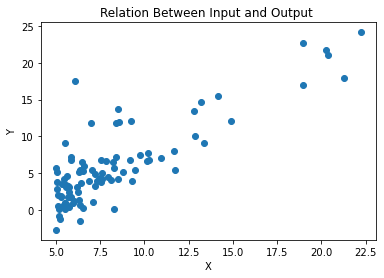

In [61]:
plt.scatter(data['X'],data['Y']);
plt.title('Relation Between Input and Output ');
plt.xlabel('X')
plt.ylabel('Y');

In [63]:
X, Y= preprocessing(data)

## Use My Model With UniVariate DataSet


In [65]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)
weight ,cost=fit(X_train,y_train,.001,2000)
y_p=predict(weight,X_test)
costTrain=computeCost(X_train,y_train,weight)

r2,mae=EvaluatePerformance(y_test,y_p);
print('costTrain  =',costTrain)
print('\nr2       =',r2)
print('\nmae       =',mae)
print('\nWeights =>',weight.T)

costTrain  = 4.687946180724253

r2       = 0.5752886470736966

mae       = 13.3530791028608

Weights => [[-1.28495597  0.93463939]]


## Plot Performance on the Training Set and the Test Set

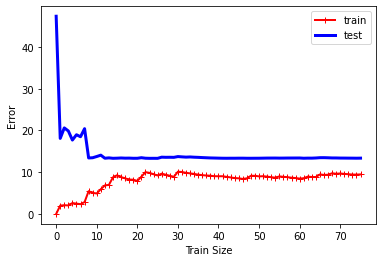

In [66]:
plot_TT_Curves(X,Y,0.001,2000)

## To Detect When Cost doesn't Change again with Increasing in Iteration 

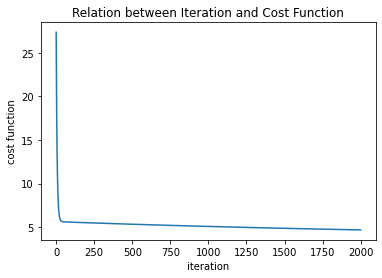

In [67]:
iteration=np.array(range(0, 2000))
cost=cost
plt.plot(iteration,cost)
plt.title('Relation between Iteration and Cost Function')
plt.xlabel('iteration')
plt.ylabel('cost function');

**Approximately at 1500 iteration ,  Cost Function dont decrease again**

## Draw Best Fit Line

In [68]:
x = np.linspace(data['X'].min(), data['X'].max(), 100)
f =weight[0, 0] + (weight[1, 0] * x)

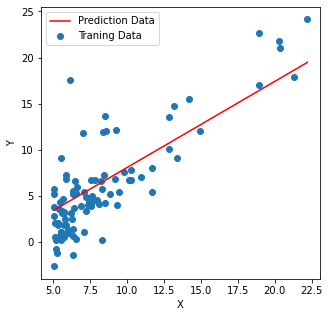

In [69]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction Data')
ax.scatter(data['X'], data['Y'], label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('X')
ax.set_ylabel('Y');

## Use scikit-learn library to compare with my model 

In [70]:
reg = LinearRegression()
reg = reg.fit(X_train, y_train)
Y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)
print('r2  =',r2)
print('\nmsa =',mse)

r2  = 0.5003441133385782

msa = 15.709362447765184


# Use MultiVariate DataSet

In [71]:
data2=pd.read_csv('multivariateData.dat',header=None,names=['X1','X2','Y'])
data2.head(1)

,X1,X2,Y
0,2104,3,399900


# Feature Scaling
 > **``Due to range of each Features are differ from each other we must do Standardization``**

# $X=\frac{X-X_{mean}}{\sigma}$

In [72]:
data2=(data2-data2.mean())/data2.std()
data2.head(1)

,X1,X2,Y
0,0.13001,-0.223675,0.475747


## Explore MultiVariate DataSet

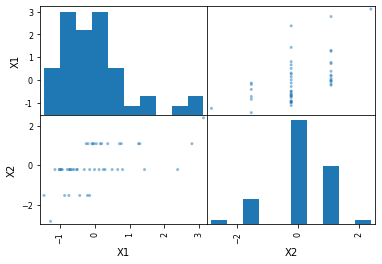

In [73]:
features = ['X1','X2'] 
scatter_matrix(data2[features]) 
plt.show() 

In [74]:
X2, Y2= preprocessing(data2)

## Use My Model With MultiVariate DataSet

In [75]:
X_train, X_test, y_train, y_test = train_test_split( X2, Y2, test_size=0.2, random_state=42)
weight ,cost=fit(X_train,y_train,.001,4000)
y_p=predict(weight,X_test)
costTrain=computeCost(X_train,y_train,weight)
r2,mae=EvaluatePerformance(y_test,y_p);
print('costTrain  =',costTrain)
print('\nr2       =',r2)
print('\nmae      =',mae)
print('\nWeights =>',weight.T)

costTrain  = 0.1026884558363098

r2       = 0.5207931112141397

mae      = 0.5440083623621289

Weights => [[-0.09712899  0.78735902  0.01717904]]


## Plot Performance on the Training Set and the Test Set

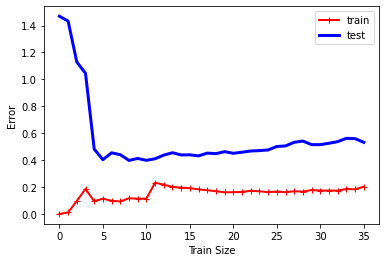

In [76]:
plot_TT_Curves(X2,Y2,0.001,4000);

## To Detect When Cost doesn't Change again with Increasing in Iteration 

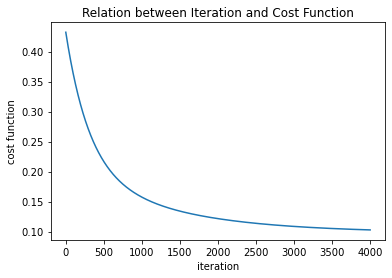

In [77]:
iteration=np.array(range(0, 4000))
cost=cost
plt.plot(iteration,cost)
plt.title('Relation between Iteration and Cost Function')
plt.xlabel('iteration')
plt.ylabel('cost function');

**Approximately at 800 iteration , Cost Function dont decrease again**

# Use scikit-learn library to compare with my model

In [78]:
reg = LinearRegression()
reg = reg.fit(X_train, y_train)
Y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)
print('r2  =',r2)
print('\nmsa =',mse)

r2  = 0.514884881274144

msa = 0.5507155415979271
